In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [37]:
g_Ca = 1.1 #mS/cm^2
g_L = 0.5    #mS/cm^2
g_K = 2     #mS/cm^2
E_Ca = 100  #mV
E_L = -50   #mV
E_K = -70   #mV
J = 15  #uA/cm^2
Cm = 1

In [38]:
def m_inf(Vm):
    return 0.5 * (1 + np.tanh( (Vm+1)/15 ))


def n_inf(Vm):
    return 0.5 * (1 + np.tanh( Vm/30 ))


def tau(Vm):
    return 5 / np.cosh( Vm/60 )

In [39]:
def solucoes(v, t):
    n0 = 1/10
    v0 = v
    def dALLdt(X,t):
        Vm, n = X

        I_Ca = g_Ca * m_inf(Vm) * (Vm - E_Ca)
        I_K = g_K * n * (Vm - E_K)
        I_L = g_L * (Vm - E_L)

        dVmdt = J - I_Ca - I_K - I_L
        dndt = (n_inf(Vm) - n) / tau(Vm)

        return dVmdt, dndt


    X = odeint(dALLdt, [v0, n0], t)
    val_Vm = X[:,0]
    val_n = X[:,1]

    return val_Vm, val_n

In [40]:
t = np.arange(0,20,0.01)

In [41]:
Vm1, n1 = solucoes(18, t)
Vm2, n2 = solucoes(-14.8, t)
Vm3, n3 = solucoes(-14.7, t)
Vm4, n4 = solucoes(-12, t)

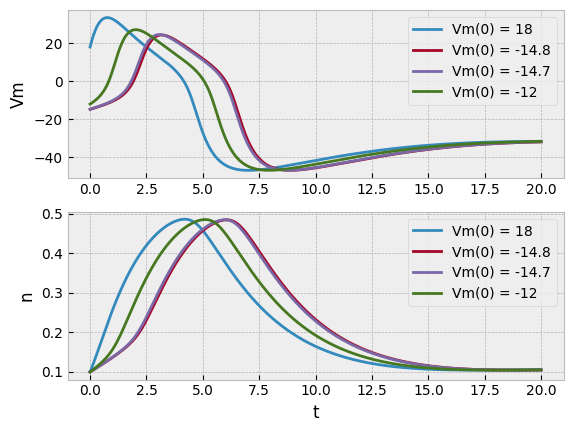

In [42]:
plt.style.use('bmh')

plt.figure()

plt.subplot(2,1,1)
plt.plot(t, Vm1, label='Vm(0) = 18')
plt.plot(t, Vm2, label='Vm(0) = -14.8')
plt.plot(t, Vm3, label='Vm(0) = -14.7')
plt.plot(t, Vm4, label='Vm(0) = -12')
plt.ylabel('Vm')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, n1, label='Vm(0) = 18')
plt.plot(t, n2, label='Vm(0) = -14.8')
plt.plot(t, n3, label='Vm(0) = -14.7')
plt.plot(t, n4, label='Vm(0) = -12')
plt.xlabel('t')
plt.ylabel('n')
plt.legend()

plt.show()